In [1]:
import pandas as pd
import scanpy as sc

In [ ]:
adata = sc.read_csv("grp1_no_cellId.csv")
adata

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [ ]:
sc.pp.log1p(adata)


In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [ ]:
sc.pl.highly_variable_genes(adata)


In [ ]:
adata = adata[:, adata.var.highly_variable]
adata

In [ ]:
only_hvg_df = pd.DataFrame(data=adata.X, columns=adata.var.index)
only_hvg_df.head()

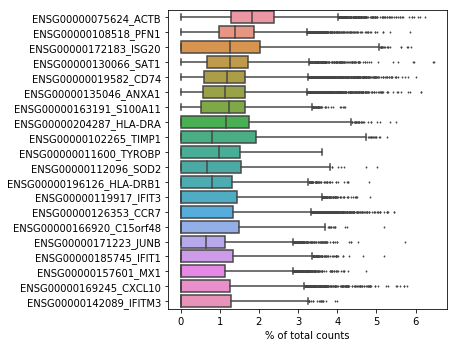

In [9]:
sc.pl.highest_expr_genes(adata, n_top=20, )

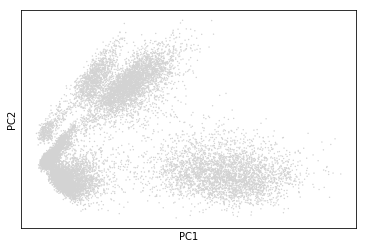

In [10]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata)

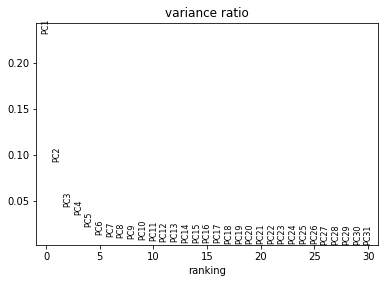

In [11]:
sc.pl.pca_variance_ratio(adata)

In [12]:
from sklearn.decomposition import NMF

In [13]:
nmf = NMF(n_components=50)
W = nmf.fit_transform(only_hvg_df)
H = nmf.components_

In [31]:
nmf_hvg = pd.DataFrame(W)
nmf_hvg.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.240885,0.000000,0.380985,0.228393,0.000000,0.000000,0.000000,0.042940,0.000000,...,0.013957,0.087008,0.0,0.130413,0.093277,0.100569,0.003278,0.0,0.001656,0.002278
1,0.0,0.105012,0.000000,0.306724,0.093049,0.002998,0.013627,0.160174,0.017658,0.025144,...,0.000000,0.103367,0.0,0.069403,0.056633,0.104350,0.034990,0.0,0.086448,0.000000
2,0.0,0.058110,0.000196,0.338321,0.127829,0.121360,0.009917,0.000000,0.000000,0.000000,...,0.004898,0.096537,0.0,0.172624,0.022226,0.000000,0.000097,0.0,0.001099,0.000000
3,0.0,0.042236,0.040762,0.248727,0.000000,0.000562,0.057635,0.000000,0.003827,0.043411,...,0.004718,0.022977,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.050990,0.000000
4,0.0,0.186899,0.000000,0.258391,0.096729,0.000000,0.000000,0.005706,0.000000,0.018767,...,0.041111,0.035804,0.0,0.109660,0.042539,0.022351,0.000000,0.0,0.003193,0.004887


In [32]:
nmf_hvg.to_csv("nmf_hvg_grp1.csv", index=False)

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
embed_data = TSNE(n_components=2, perplexity=30, n_iter=5000).fit_transform(nmf_hvg)

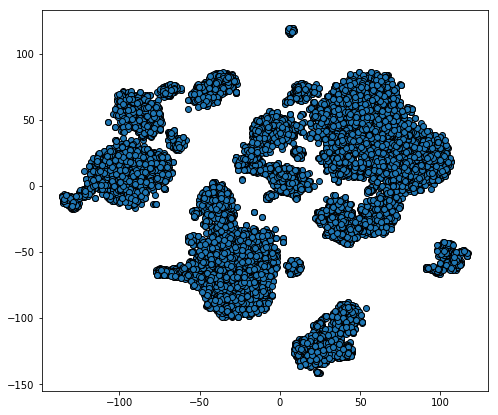

In [18]:
plt.figure(figsize=(8,7))
plt.scatter(embed_data[:, 0], embed_data[:, 1], edgecolor='black')
plt.show()

In [19]:
from sklearn.cluster import SpectralClustering

In [22]:
def scatter_plot_clusters(df):
    plt.figure(figsize=(8, 7))
    number_of_clusters = max(df['labels']) + 1
    for j in range(-1, number_of_clusters):
        if j == -1:
            label = 'noise'
        else:
            label = 'cluster %d' % j
            
        cluster = df.loc[df['labels'] == j]
        plt.scatter(x=cluster.iloc[:, 0], y=cluster.iloc[:, 1], label=label, alpha=0.75, edgecolor='black')
    plt.legend()

In [26]:
x = pd.DataFrame(embed_data)
clustering = SpectralClustering(n_clusters=9, affinity='nearest_neighbors').fit(nmf_hvg)
x['labels'] = clustering.labels_

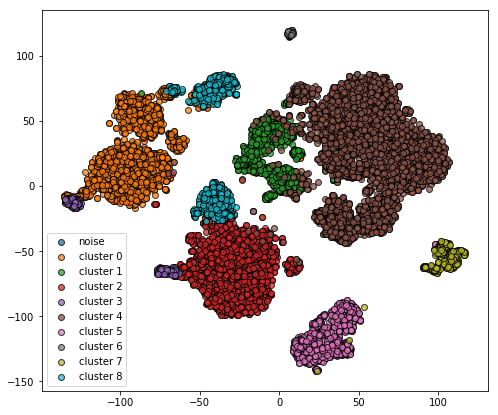

In [27]:
scatter_plot_clusters(x)

In [29]:
x.head()
x.drop(columns=['labels'], inplace=True)

In [30]:
x.to_csv("hvg_tsne_grp1.csv", index=False)